In [7]:
import numpy as np
import EQTransformer as eqt
from EQTransformer.core.trainer import trainer
# np.array([1, 2, 3, 4, 5])
# dir(EQTransformer)
# print(eqt.__version__)
trainer(input_hdf5='test.hdf5', input_csv='training_PandS_up.csv', output_name='test_trainer_up', cnn_blocks=2, lstm_blocks=1, padding='same', activation='relu', drop_rate=0.2, label_type='gaussian', add_event_r=0.6, add_gap_r=0.2, shift_event_r=0.9, add_noise_r=0.5, mode='generator', train_valid_test_split=[0.60, 0.20, 0.20], batch_size=20, epochs=10, patience=2, gpuid=None, gpu_limit=None, input_dimention=(1500, 3))
# trainer(input_hdf5='/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.hdf5',
#         input_csv='/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.csv',
#         output_name='test_trainer',                
#         cnn_blocks=2,
#         lstm_blocks=1,
#         padding='same',
#         activation='relu',
#         drop_rate=0.2,
#         label_type='gaussian',
#         add_event_r=0.6,
#         add_gap_r=0.2,
#         shift_event_r=0.9,
#         add_noise_r=0.5, 
#         mode='generator',
#         train_valid_test_split=[0.60, 0.20, 0.20],
#         batch_size=20,
#         epochs=10, 
#         patience=2,
#         gpuid=None,
#         gpu_limit=None)


  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-216:
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/opt/python@


Epoch 00004: val_loss improved from 0.00002 to 0.00001, saving model to /Users/jun/phasepick/test_trainer_up_outputs/models/test_trainer_up_004.h5

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt



Epoch 00008: val_loss improved from 0.00001 to 0.00001, saving model to /Users/jun/phasepick/test_trainer_up_outputs/models/test_trainer_up_008.h5


KeyboardInterrupt
KeyboardInterrupt
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/local/opt/python@3.7/Frameworks/Python.framework/Versions/3.7/

Learning rate:  0.001
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 1500, 3)      0                                            
__________________________________________________________________________________________________
conv1d_37 (Conv1D)              (None, 1500, 8)      272         input[0][0]                      
__________________________________________________________________________________________________
max_pooling1d_8 (MaxPooling1D)  (None, 750, 8)       0           conv1d_37[0][0]                  
__________________________________________________________________________________________________
conv1d_38 (Conv1D)              (None, 750, 16)      1168        max_pooling1d_8[0][0]            
______________________________________________________________________

2023-04-24 12:31:30.296911: E tensorflow/core/grappler/optimizers/dependency_optimizer.cc:697] Iteration = 0, topological sort failed with message: The graph couldn't be sorted in topological order.
2023-04-24 12:31:30.438000: E tensorflow/core/grappler/optimizers/dependency_optimizer.cc:697] Iteration = 1, topological sort failed with message: The graph couldn't be sorted in topological order.
2023-04-24 12:31:30.742667: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:502] model_pruner failed: Invalid argument: MutableGraphView::MutableGraphView error: node 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat' has self cycle fanin 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat'.
2023-04-24 12:31:31.153243: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:502] remapper failed: Invalid argument: MutableGraphView::MutableGraphView error: node 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat' has self cycle fanin 'loss_3/detector_loss

3585/3586 [============================>.] - ETA: 0s - loss: 0.0570 - detector_loss: 0.2547 - picker_P_loss: 0.0402 - picker_S_loss: 0.0492 - detector_f1: 0.8608 - picker_P_f1: 0.3658 - picker_S_f1: 0.1533

2023-04-24 12:41:12.733736: E tensorflow/core/grappler/optimizers/dependency_optimizer.cc:697] Iteration = 0, topological sort failed with message: The graph couldn't be sorted in topological order.
2023-04-24 12:41:12.760975: E tensorflow/core/grappler/optimizers/dependency_optimizer.cc:697] Iteration = 1, topological sort failed with message: The graph couldn't be sorted in topological order.
2023-04-24 12:41:12.817579: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:502] model_pruner failed: Invalid argument: MutableGraphView::MutableGraphView error: node 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat' has self cycle fanin 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat'.
2023-04-24 12:41:12.902183: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:502] remapper failed: Invalid argument: MutableGraphView::MutableGraphView error: node 'loss_3/detector_loss/binary_crossentropy/weighted_loss/concat' has self cycle fanin 'loss_3/detector_loss

3586/3586 [==============================] - 616s 172ms/step - loss: 0.0570 - detector_loss: 0.2547 - picker_P_loss: 0.0401 - picker_S_loss: 0.0492 - detector_f1: 0.8608 - picker_P_f1: 0.3659 - picker_S_f1: 0.1534 - val_loss: 0.0236 - val_detector_loss: 0.1553 - val_picker_P_loss: 0.0186 - val_picker_S_loss: 0.0379 - val_detector_f1: 0.9313 - val_picker_P_f1: 0.6119 - val_picker_S_f1: 0.3338

Epoch 00001: val_loss improved from inf to 0.02364, saving model to /Users/jun/phasepick/test_trainer_up_outputs/models/test_trainer_up_001.h5
Epoch 2/10
Learning rate:  0.001
3586/3586 [==============================] - 600s 167ms/step - loss: 0.0395 - detector_loss: 0.1524 - picker_P_loss: 0.0266 - picker_S_loss: 0.0369 - detector_f1: 0.9258 - picker_P_f1: 0.5584 - picker_S_f1: 0.4006 - val_loss: 0.0201 - val_detector_loss: 0.1141 - val_picker_P_loss: 0.0167 - val_picker_S_loss: 0.0316 - val_detector_f1: 0.9465 - val_picker_P_f1: 0.6472 - val_picker_S_f1: 0.4896

Epoch 00002: val_loss improved f

In [2]:
dir(eqt.picker)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [10]:
from EQTransformer.core.tester import tester
# test.hdf5', input_csv='training_PandS.csv'
# tester(input_hdf5='test.hdf5', input_testset='test_trainer_outputs/test.npy', input_model='test_trainer_outputs/models/test_trainer_005.h5', output_name='test_tester', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(9000, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)
tester(input_hdf5='test.hdf5', input_testset='test_trainer_up_outputs/test.npy', input_model='test_trainer_up_outputs/models/test_trainer_up_004.h5', output_name='test_tester_up', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(1500, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)

Loading the model ...
Loading is complete!
Testing ...
Writting results into: " test_tester_up_outputs "


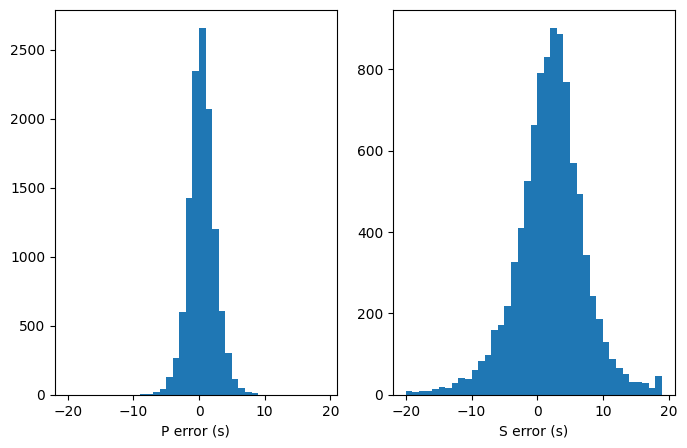

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(121)
# pred = pd.read_csv('test_tester_outputs/X_test_results.csv')
pred = pd.read_csv('test_tester_up_outputs/X_test_results.csv')
plt.hist(pred['P_error'], bins=np.arange(-20,20))
plt.xlabel('P error (s)')
plt.subplot(122)
plt.hist(pred['S_error'], bins=np.arange(-20,20))
plt.xlabel('S error (s)')
plt.show()

In [14]:
pred['S_error'].describe()

count    9861.000000
mean        3.436264
std        31.837629
min      -758.000000
25%        -1.000000
50%         2.000000
75%         5.000000
max       444.000000
Name: S_error, dtype: float64

In [6]:
import seisbench as sb
import seisbench.data as sbd
data = sbd.DummyDataset()

In [12]:
data.get_waveforms(0)

array([[  34.,   47.,   51., ...,  667.,  695.,  662.],
       [-100.,  -99.,  -98., ..., -229., -208., -201.],
       [ 645.,  636.,  625., ...,  420.,  416.,  374.]])

In [ ]:
import h5py
with h5py.File('/Users/jun/phasepick/test.hdf5','w+') as f:
    

In [4]:
import h5py
f = h5py.File('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.hdf5','r')
# print(dir(f['data/109C.TA_20060723155859_EV']))
# print(dir(f))
# dset = f['data/109C.TA_20060723155859_EV']
print(dset[...])
f.close

[[-0.         -0.          0.        ]
 [-0.0085106  -0.03259867  0.00775105]
 [-0.02285321 -0.07897092  0.02457174]
 ...
 [ 0.10581018 -0.12264204 -0.062743  ]
 [ 0.00339233 -0.05204263 -0.01183952]
 [-0.         -0.         -0.        ]]


<bound method File.close of <HDF5 file "100samples.hdf5" (mode r)>>

In [15]:
import pandas as pd
csv = pd.read_csv('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.csv')
csv

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.50,17.080000,...,None,None,0.9200,102.09,159.3,[ 56.79999924 55.40000153 47.40000153],[[ 2896.]],2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.50,16.879999,...,None,None,0.9100,101.34,281.7,[ 65. 65.5 61.40000153],[[ 5508.]],2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.50,17.260000,...,None,None,0.9200,101.87,280.5,[ 37.20000076 42. 38.59999847],[[ 3114.]],2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV
3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.50,17.280001,...,None,None,0.9300,103.26,281.6,[ 54.09999847 54.90000153 45.5 ],[[ 3152.]],2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV
4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.50,18.139999,...,None,None,0.9200,102.48,4.7,[ 58.20000076 56.20000076 53.79999924],[[ 3134.]],2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.58,4.130000,...,CI,None,0.2089,23.23,240.1,[ 17.39999962 15.80000019 12.80000019],[[ 2392.]],2007-09-16 01:38:21.090000,earthquake_local,109C.TA_20070916013820_EV
96,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.58,8.910000,...,CI,None,0.4792,53.29,28.2,[ 27.29999924 28. 31.89999962],[[ 1766.]],2007-09-18 20:02:18.960000,earthquake_local,109C.TA_20070918200217_EV
97,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.53,15.220000,...,CI,None,0.8566,95.26,21.2,[ 20.39999962 20.89999962 12.80000019],[[ 2310.]],2007-09-29 22:37:10.120000,earthquake_local,109C.TA_20070929223709_EV
98,TA,109C,BH,32.8889,-117.1051,150.0,400.0,manual,0.61,15.120000,...,CI,None,0.8464,94.12,20.1,[ 33.09999847 31.60000038 22.20000076],[[ 2134.]],2007-09-30 01:03:45.690000,earthquake_local,109C.TA_20070930010344_EV


In [51]:
import h5py
f = h5py.File('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/EqT_model.h5','r')
# list(f.keys())
f['model_weights'].keys()
# f['optimizer_weights'].keys()
# dset = f['data/109C.TA_20060723155859_EV']
# dset[...]

<KeysViewHDF5 ['activation_1', 'activation_10', 'activation_11', 'activation_12', 'activation_13', 'activation_14', 'activation_2', 'activation_3', 'activation_4', 'activation_5', 'activation_6', 'activation_7', 'activation_8', 'activation_9', 'add_1', 'add_10', 'add_11', 'add_2', 'add_3', 'add_4', 'add_5', 'add_6', 'add_7', 'add_8', 'add_9', 'attentionD', 'attentionD0', 'attentionP', 'attentionS', 'batch_normalization_1', 'batch_normalization_10', 'batch_normalization_11', 'batch_normalization_12', 'batch_normalization_13', 'batch_normalization_14', 'batch_normalization_15', 'batch_normalization_16', 'batch_normalization_17', 'batch_normalization_2', 'batch_normalization_3', 'batch_normalization_4', 'batch_normalization_5', 'batch_normalization_6', 'batch_normalization_7', 'batch_normalization_8', 'batch_normalization_9', 'bidirectional_1', 'bidirectional_2', 'bidirectional_3', 'conv1d_1', 'conv1d_10', 'conv1d_11', 'conv1d_12', 'conv1d_13', 'conv1d_14', 'conv1d_15', 'conv1d_16', 'conv

In [26]:
class Test():
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def _getx(self):
        return self.x
    def _xaddy(self):
        x = self._getx()
        # x += self.y
        x.__add__(self.y)
        print(id(x))
        print(id(self.x))
        # x = .__add__(self.y)
        return self.x

testaa = Test(5,11)._xaddy()
testaa

4425894320
4425894320


5